# Imports and Dataset Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# set global random seed
np.random.seed(42)

Reading the dataset

In [2]:
df = pd.read_csv("dataset/voice.csv")

# Preprocessing and Feature Selection

Checking to see if the dataset has any null values that need to be cleaned up.

In [3]:
df.isnull().values.sum()

0

Checking the correlation matrix to see if there are redundant features.

In [4]:
corr_mat = df.corr().abs()
corr_mat

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,0.739039,0.925445,0.911416,0.740997,0.627605,0.322327,0.316036,0.601203,0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,0.216979
sd,0.739039,1.000000,0.562603,0.846931,0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,0.529150,0.739039,0.466281,0.345609,0.129662,0.482726,0.357667,0.482278,0.475999,0.122660
median,0.925445,0.562603,1.000000,0.774922,0.731849,0.477352,0.257407,0.243382,0.502005,0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,0.213298
Q25,0.911416,0.846931,0.774922,1.000000,0.477140,0.874189,0.319475,0.350182,0.648126,0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,0.141377
Q75,0.740997,0.161076,0.731849,0.477140,1.000000,0.009636,0.206339,0.148881,0.174905,0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,0.023750,0.335114,0.335648,0.216475
IQR,0.627605,0.874660,0.477352,0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,0.403764,0.627605,0.534462,0.222680,0.069588,0.333362,0.357037,0.337877,0.331563,0.041252
skew,0.322327,0.314597,0.257407,0.319475,0.206339,0.249497,1.000000,0.977020,0.195459,0.079694,0.434859,0.322327,0.167668,0.216954,0.080861,0.336848,0.061608,0.305651,0.304640,0.169325
kurt,0.316036,0.346241,0.243382,0.350182,0.148881,0.316185,0.977020,1.000000,0.127644,0.109884,0.406722,0.316036,0.194560,0.203201,0.045667,0.303234,0.103313,0.274500,0.272729,0.205539
sp.ent,0.601203,0.716620,0.502005,0.648126,0.174905,0.640813,0.195459,0.127644,1.000000,0.866411,0.325298,0.601203,0.513194,0.305826,0.120738,0.293562,0.294869,0.324253,0.319054,0.198074
sfm,0.784332,0.838086,0.661690,0.766875,0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,0.485913,0.784332,0.421066,0.362100,0.192369,0.428442,0.289593,0.436649,0.431580,0.211477


Listing all the features with more than 95% correlation to another feature

In [5]:
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['kurt', 'centroid', 'dfrange']


Dropping redundant features.

In [6]:
print(f"Number of features before removing redundant features: {len(df.columns) - 1}")
df_pre = df.drop(to_drop, axis=1)
print(f"Number of features after removing redundant features: {len(df_pre.columns) - 1}")

Number of features before removing redundant features: 20
Number of features after removing redundant features: 17


Converting labels from categorical to numerical.

In [7]:
df_pre.label

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

Coding male as 1 and female as 0.

In [8]:
df_pre.label = [1 if class_lbl == "male" else 0 for class_lbl in df.label]

Separating targets and features.

In [9]:
y = df_pre.label.values
X = df_pre.drop(["label"], axis=1)

Scaling the data helps most of the classification techniques converge to a better solution and faster.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Comparison

We will compare the performance of the following algorithms once on the original dataset and once after performing feature generation with PCA:

- Logistic Regression
- SVM (with linear kernel)
- Naive Bayes
- Decision Tree
- Random Forest ($N_{estimators} = 100$)
- K-nearest Neighbors ($K = \sqrt{N}$)
- AdaBoost ($N_{estimators} = 200$)
- Multilayer Perceptron (3 layers with 100 and 50 neurons in the hidden layers, trained with momentum SGD)


In [11]:
def compare_classifiers(X, y):
    method_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'kNN', 'AdaBoost', 'MLP']
    method_ma_scores = []
    ## DATASET SPLITTING
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ## CLASSIFIERS
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
    clfs = [
        LogisticRegression(), SVC(kernel='linear'),
        GaussianNB(), DecisionTreeClassifier(),
        RandomForestClassifier(), KNeighborsClassifier(n_neighbors=int(np.sqrt(x_train.shape[0]))),
        AdaBoostClassifier(n_estimators=200), MLPClassifier((100, 50), max_iter=2000)
    ]
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7,10))

    for idx, (clf, ax) in enumerate(zip(clfs, axes.flatten())):
        clf.fit(x_train, y_train)
        clf_ma_score = 100*round(clf.score(x_test, y_test), 5)
        print(f"{method_names[idx]} Mean Accuracy Score: {clf_ma_score}%")
        method_ma_scores.append(clf_ma_score)
        ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, ax=ax, cmap='Blues', display_labels=['Male', 'Female'])
        ax.title.set_text(method_names[idx])
    plt.tight_layout()
    plt.show()
    print()
    plt.figure(figsize=(15,10))
    plt.ylim([85, 100])
    ax = plt.gca()
    ax.bar_label(plt.bar(method_names, method_ma_scores, width=0.5))
    plt.xlabel('Methods')
    plt.ylabel('Mean Accuracy')

## Before Feature Generation with PCA

Logistic Regression Mean Accuracy Score: 98.107%
SVM Mean Accuracy Score: 97.634%
Naive Bayes Mean Accuracy Score: 92.744%
Decision Tree Mean Accuracy Score: 96.53%
Random Forest Mean Accuracy Score: 98.265%
kNN Mean Accuracy Score: 96.372%
AdaBoost Mean Accuracy Score: 98.265%
MLP Mean Accuracy Score: 97.792%


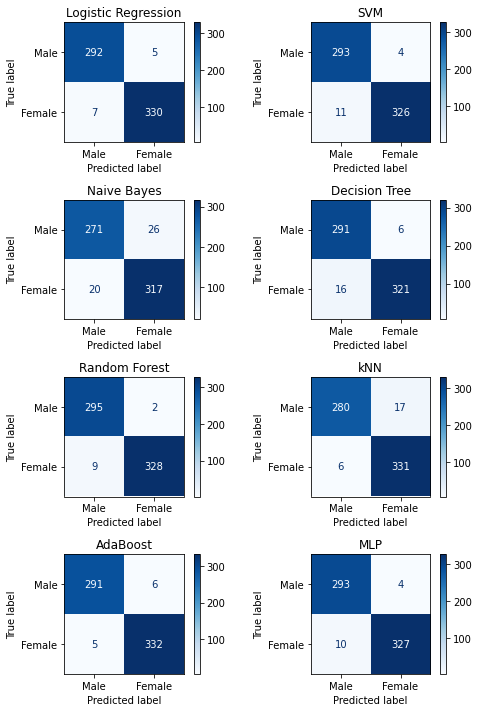

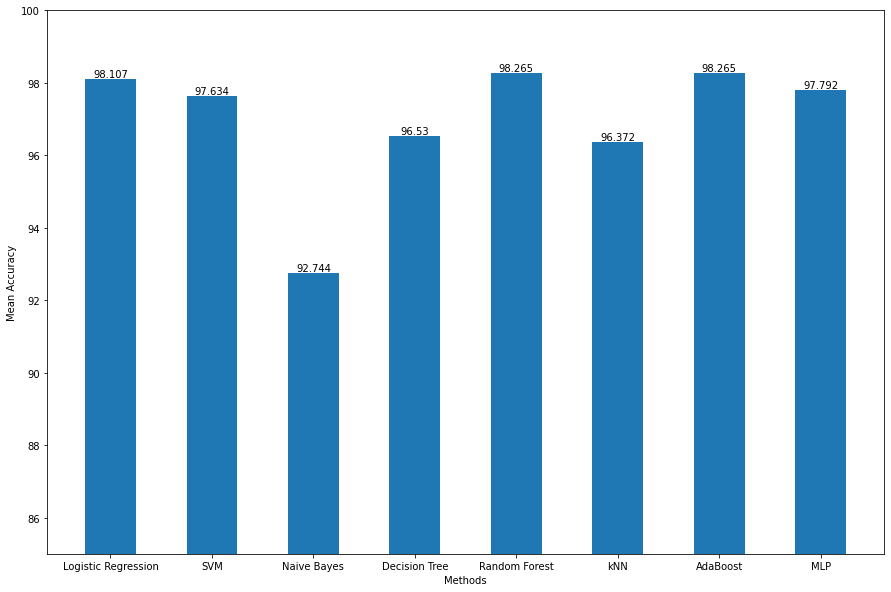

In [12]:
compare_classifiers(X_scaled, y)

## After Feature Generation with PCA

Visualization on the two most informative features of the dataset.

<AxesSubplot:>

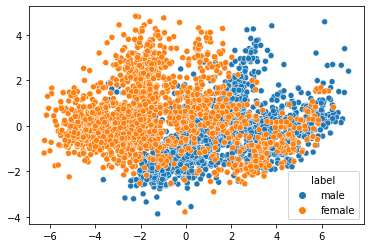

In [13]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2).fit(X_scaled)
X_scaled_pca_2 = pca_2.transform(X_scaled)
sns.scatterplot(x=X_scaled_pca_2[:,0], y=X_scaled_pca_2[:,1], hue=df.label)

Comparison after running PCA while preserving 90% of the information.

In [14]:
pca = PCA(n_components=0.9).fit(X_scaled) 
X_scaled_pca = pca.transform(X_scaled)

Number of features after dimensionality reduction.

In [15]:
print(f"Number of features:\n\tBefore PCA: {X_scaled.shape[1]}\n\tAfter PCA: {X_scaled_pca.shape[1]}")

Number of features:
	Before PCA: 17
	After PCA: 8


Comparison.

Logistic Regression Mean Accuracy Score: 94.637%
SVM Mean Accuracy Score: 94.953%
Naive Bayes Mean Accuracy Score: 92.744%
Decision Tree Mean Accuracy Score: 91.64%
Random Forest Mean Accuracy Score: 95.584%
kNN Mean Accuracy Score: 94.006%
AdaBoost Mean Accuracy Score: 95.11%
MLP Mean Accuracy Score: 96.372%


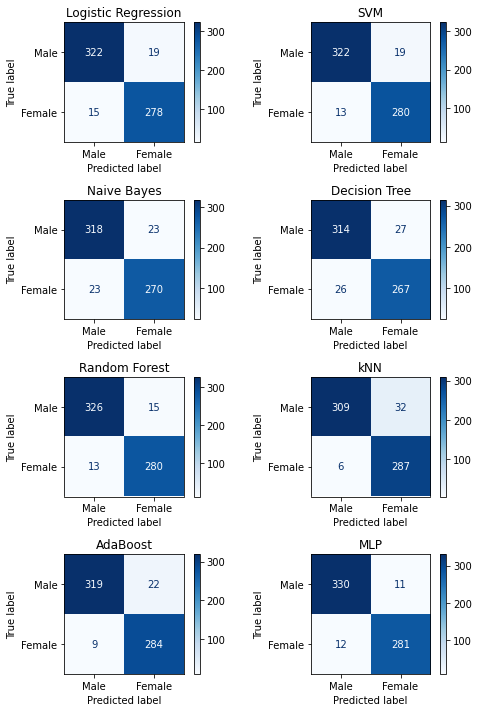

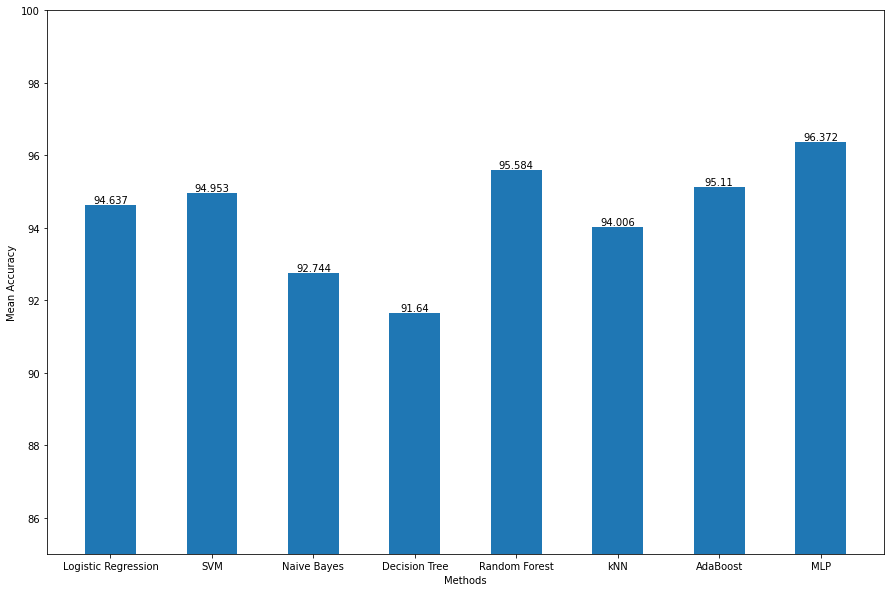

In [16]:
compare_classifiers(X_scaled_pca, y)